In [17]:
#Importing Dependencies

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import os
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Setting Median Household Income DataFrame

medium_inc = Path("med_income.csv")
medium_income = pd.read_csv(medium_inc, index_col = "DATE", parse_dates = True,  infer_datetime_format= True)
medium_income.sort_index(ascending = True, inplace =True)
medium_income.index = pd.to_datetime(medium_income.index).year

#Final Dataframe for household income 
household_income = medium_income["USA"].copy()
household_income_pct = household_income.pct_change()
household_income_pct = household_income_pct.to_frame()
household_income_final = household_income_pct.rename(columns = {'USA' : 'Median Household Income'})
household_income_final

,Median Household Income
DATE,
2008,NaN
2009,-0.006994
2010,-0.026130
2011,-0.015266
2012,-0.001888
2013,0.035003
2014,-0.015342
2015,0.051477
2016,0.031337


In [4]:
# Setting Median Home Sale Price DataFrame

med_house = Path("median_household_sale_price.csv")
med_household_sale = pd.read_csv(med_house, index_col = "DATE", parse_dates = True,  infer_datetime_format= True)
med_household_sale.sort_index(ascending = True, inplace =True)
med_household_sale_price = med_household_sale.drop(med_household_sale.index[0:179])
med_sale_price_average = med_household_sale_price.groupby(pd.to_datetime(med_household_sale_price.index).year).mean()
med_sale_pct = med_sale_price_average.pct_change()
med_sale_final = med_sale_pct.rename(columns = {'MSPUS' : 'Median Home Sale Price'})
med_sale_final

,Median Home Sale Price
DATE,
2007,NaN
2008,-0.037122
2009,-0.060553
2010,0.032692
2011,0.009879
2012,0.086705
2013,0.089300
2014,0.073434
2015,0.029306


In [5]:
# Setting Unemployment Rate DataFrame

employment_csv = Path("employment.csv")
employment_rate_csv = pd.read_csv(employment_csv, parse_dates = True,  infer_datetime_format= True )
employment_rate_csv = employment_rate_csv.drop(employment_rate_csv.index[0:27])
employment_rate_csv = employment_rate_csv.rename(columns = {'Year' : 'DATE'})
employment_rate_csv = employment_rate_csv.set_index("DATE")
national_employment = employment_rate_csv["United States"]
national_employment_pct = national_employment.pct_change()
national_employment_2 = national_employment_pct.to_frame()
national_employment_final = national_employment_2.rename(columns = {'United States' : 'US Unemployment Rate'})
national_employment_final

,US Unemployment Rate
DATE,
2007,NaN
2008,0.260870
2009,0.603448
2010,0.032258
2011,-0.072917
2012,-0.089888
2013,-0.086420
2014,-0.162162
2015,-0.145161


In [6]:
# Setting Delinquency Rate DataFrame

delinquency = Path("30_89_Day_delinquency.csv")
delinquency_rate = pd.read_csv(delinquency, parse_dates = True,  infer_datetime_format= True )
delinquency_rate = delinquency_rate.set_index("DATE")
delinquency_rate = delinquency_rate["United States Delinquency"]
delinquency_rate_average = delinquency_rate.groupby(pd.to_datetime(delinquency_rate.index).year).mean()
delinquency_rate_pct = delinquency_rate_average.pct_change()
delinquency_rate_final = delinquency_rate_pct.to_frame()
delinquency_rate_final

,United States Delinquency
DATE,
2008,NaN
2009,0.119617
2010,-0.068376
2011,-0.087156
2012,-0.015075
2013,-0.132653
2014,-0.144118
2015,-0.075601
2016,-0.044610


In [7]:
# Setting Mortality Rate DataFrame

mortality_df = Path("united_states_mortality_rate.csv")
mortality_rate_csv = pd.read_csv(mortality_df, parse_dates = True,  infer_datetime_format= True )
mortality_rate =  mortality_rate_csv.drop(mortality_rate_csv.index[0:57])
mortality_rate_drop = mortality_rate.drop(mortality_rate_csv.index[73:151])
mortality_rate_drop = mortality_rate_drop.rename(columns = {'date' : 'DATE'})
mortality_rate_drop_2 = mortality_rate_drop.set_index("DATE")
mortality_rate_drop_2.index = pd.to_datetime(mortality_rate_drop_2.index).year
mortality_rate_cleaned = mortality_rate_drop_2.pop(' Deaths per 1000 People')
mortality_rate_cleaned_pct = mortality_rate_drop_2
mortality_rate_cleaned_pct = mortality_rate_cleaned_pct.rename(columns = {' Annual % Change' : 'Mortality Rate'})
mortality_rate_final = mortality_rate_cleaned_pct / 100
mortality_rate_final

,Mortality Rate
DATE,
2007,-0.0095
2008,-0.0096
2009,0.0009
2010,0.0009
2011,0.0009
2012,0.0009
2013,0.0009
2014,0.0129
2015,0.0127


In [8]:
# Combining all of the DataFrames using the 'concat' function

combined_df = pd.concat([household_income_final, med_sale_final, national_employment_final, delinquency_rate_final, mortality_rate_final], axis="columns")
combined_df

,Median Household Income,Median Home Sale Price,US Unemployment Rate,United States Delinquency,Mortality Rate
DATE,,,,,
2007,NaN,NaN,NaN,NaN,-0.0095
2008,NaN,-0.037122,0.260870,NaN,-0.0096
2009,-0.006994,-0.060553,0.603448,0.119617,0.0009
2010,-0.026130,0.032692,0.032258,-0.068376,0.0009
2011,-0.015266,0.009879,-0.072917,-0.087156,0.0009
2012,-0.001888,0.086705,-0.089888,-0.015075,0.0009
2013,0.035003,0.089300,-0.086420,-0.132653,0.0009
2014,-0.015342,0.073434,-0.162162,-0.144118,0.0129
2015,0.051477,0.029306,-0.145161,-0.075601,0.0127


In [9]:
# Using the `corr` function to calculate correlations for each set of data
correlation = combined_df.corr()
correlation

,Median Household Income,Median Home Sale Price,US Unemployment Rate,United States Delinquency,Mortality Rate
Median Household Income,1.000000,-0.105423,-0.291347,0.304934,0.350242
Median Home Sale Price,-0.105423,1.000000,-0.803336,-0.683958,0.367646
US Unemployment Rate,-0.291347,-0.803336,1.000000,0.839405,-0.565877
United States Delinquency,0.304934,-0.683958,0.839405,1.000000,-0.322826
Mortality Rate,0.350242,0.367646,-0.565877,-0.322826,1.000000


<AxesSubplot:title={'center':'Correlation Between all DataFrames'}>

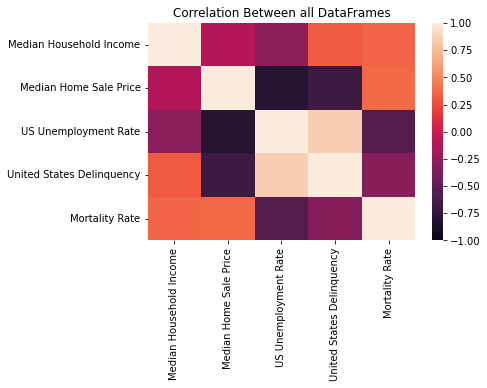

In [21]:
# Created a heatmap from the correlation values and adjusted the scale
ax = plt.axes()
ax.set_title("Correlation Between all DataFrames")
sns.heatmap(correlation, vmin=-1, vmax=1, ax=ax)